# Segmentation

Image Segmentation refers to dividing the image into groups of pixels based on some criteria.

# Semantic Segmentation

In Semantic segmentation the goal is to assign a label (car, building, person, road, sidewalk, sky, trees etc.) to every pixel in the image.
<html>
    
<img src="http://sznur.com/article/sdc-semantic-segmentation/ss_01.jpg">
   </html>

# Semantic segmentation Using Torchvision

Now we look Segmentation by Deep learning based on Fully Convolutional Network

These models have been trained on a subset of COCO Train 2017 dataset which correspond to the PASCAL VOC dataset. There are total 20 categories supported by the models.

# Input and Outputs

These models expect a 3-channel image (RGB) which is normalized with the Imagenet mean and standard deviation, i.e.,
mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]

So, the input dimension is [Ni x Ci x Hi x Wi]
where,

    Ni -> the batch size
    Ci -> the number of channels (which is 3)
    Hi -> the height of the image
    Wi -> the width of the image

And the output dimension of the model is [No x Co x Ho x Wo]
where,

    No -> is the batch size (same as Ni)
    Co -> is the number of classes that the dataset have!
    Ho -> the height of the image (which is the same as Hi in almost all cases)
    Wo -> the width of the image (which is the same as Wi in almost all cases)

# FCN with Resnet-101 backbone Architecture

### Load the model

In [4]:
from torchvision import models
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

ImportError: No module named 'torchvision'

We have a pretrained model of FCN with a Resnet101 backbone. The pretrained=True flag will download the model if it is not already present in the cache. The .eval method will load it in inference mode.

### NOTE:
The output of torchvision models is an OrderedDict and not a torch.Tensor
And in during inference (.eval() mode ) the output, which is an OrderedDict just has one key – out. This out key holds the output and it’s corresponding value has the shape of [No x Co x Ho x Wo].

### Load the image

In [11]:
import cv2 as cv
!wget https://abcbirds.org/wp-content/uploads/2019/03/woodnymph-for-upload.jpg -O bird1.png

--2019-09-01 16:35:44--  https://abcbirds.org/wp-content/uploads/2019/03/woodnymph-for-upload.jpg
Resolving abcbirds.org (abcbirds.org)... 146.148.94.247
Connecting to abcbirds.org (abcbirds.org)|146.148.94.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102189 (100K) [image/jpeg]
Saving to: ‘bird1.png’

bird1.png           100%[===================>]  99.79K   182KB/s    in 0.5s    

2019-09-01 16:35:45 (182 KB/s) - ‘bird1.png’ saved [102189/102189]



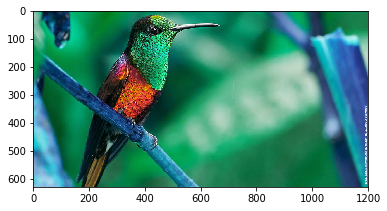

In [12]:
img=cv.imread('./bird1.png')
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

### Preprocess the image

    Resize the image to (256 x 256)
    CenterCrop it to (224 x 224)
    Convert it to Tensor – all the values in the image will be scaled so that will lie between [0, 1]instead of the original, [0, 255] range.
    Normalize it with the Imagenet specific values mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225]

And lastly, we unsqueeze the image so that it becomes [1 x C x H x W] from [C x H x W]. This is required since we need a batch while passing it through the network.

In [14]:
# Apply the transformations needed
import torchvision.transforms as T
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(), 
                 T.Normalize(mean = [0.485, 0.456, 0.406], 
                             std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)

ImportError: No module named 'torchvision'

### Forward pass through Network

In [16]:
out = fcn(inp)['out']
print (out.shape)

NameError: name 'fcn' is not defined

the 2D image (of shape [H x W]) will have each pixel corresponding to a class label, and thus for each (x, y) pixel in this 2D image will correspond to a number between 0 - 20 representing a class.

We take a max index for each pixel position, which represents the class.

In [20]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)

NameError: name 'torch' is not defined

In [21]:
print(np.unique(om))

NameError: name 'om' is not defined

### Decode Output

In [22]:
def decode_segmap(image, nc=21):
   
  label_colors = np.array([(0, 0, 0),  # 0=background
               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle
               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),
               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow
               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),
               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person
               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),
               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor
               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])
 
  r = np.zeros_like(image).astype(np.uint8)
  g = np.zeros_like(image).astype(np.uint8)
  b = np.zeros_like(image).astype(np.uint8)
   
  for l in range(0, nc):
    idx = image == l
    r[idx] = label_colors[l, 0]
    g[idx] = label_colors[l, 1]
    b[idx] = label_colors[l, 2]
     
  rgb = np.stack([r, g, b], axis=2)
  return rgb

In [23]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

NameError: name 'om' is not defined